# Assignment 1

Note: This notebook file for the assignment has deviations from the course guide with respect to the structure, sentence framing, question framing and numbering. Please consider this notebook file structure as the final structure and follow this.

In this assignment, you will explore the CIFAR10 dataset. 

You have to download the dataset from Pytorch.

Comment your code and indicate what the different instructions are doing and what you are showing and printing. 
When printing figures do not forget about the title, x and y labels. The font size should be matching the text size of the text in your report. 
Do not forget to add legends to the plots. 

------------------------

In [26]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install torchvision
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using

In [29]:
# Load all the needed packages for this assignment here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#### Exercise 1.1 - Load data

**a)** Load the CIFAR10 dataset. 

**b)** Print the number of samples and the number of classes present in the dataset. 

**c)** Also print the shape of an image in the dataset. 

In [ ]:
# Ex.1.1a,b & c
dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

print("Samples: ")
print(len(dataset_train))
print(len(dataset_test))

print("Classes")
print(len(dataset_train.classes))
print(len(dataset_test.classes))

100.0%


Samples: 
50000
10000
Classes
10
10


#### Exercise 1.2 - Quantify dataset

**a)** Print the number of samples per category.

In [17]:
# Ex.1.2a 
categories = np.array(dataset_train.targets)  
unique_labels, counts = np.unique(categories, return_counts=True) 

for label, count in zip(unique_labels, counts):
    print(f"{dataset_train.classes[label]}: {count}")

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


**b)** Plot the number of samples per category using a bar plot.

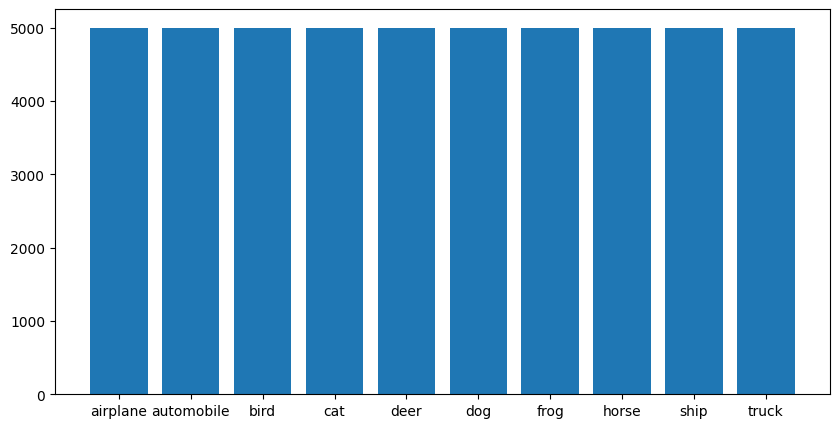

In [18]:
# Ex.1.2b 
class_names = dataset_train.classes
plt.figure(figsize=(10, 5)) 
plt.bar(class_names, counts)
plt.show()

**Reflection: Answer the below question**

Are you working with a balanced or an unbalanced dataset? Are there majoritarian classes? Do you think this will affect the later analysis and training of your models?

> All classes have the same frequency of occurances. There might be a case to be made for animals being present more (6 classes) and machines only 4 classes which could have a small effect later on as it might fit more on animals. There are no majority single classes, the dataset was made to be balanced.

#### Exercise 1.3 - Visualize images in your dataset

Create a figure with n x 4 sub-plots. The value of 'n' depends on the number of categories present in the dataset.
As the title of each row in your figure, indicate the category it belongs to.

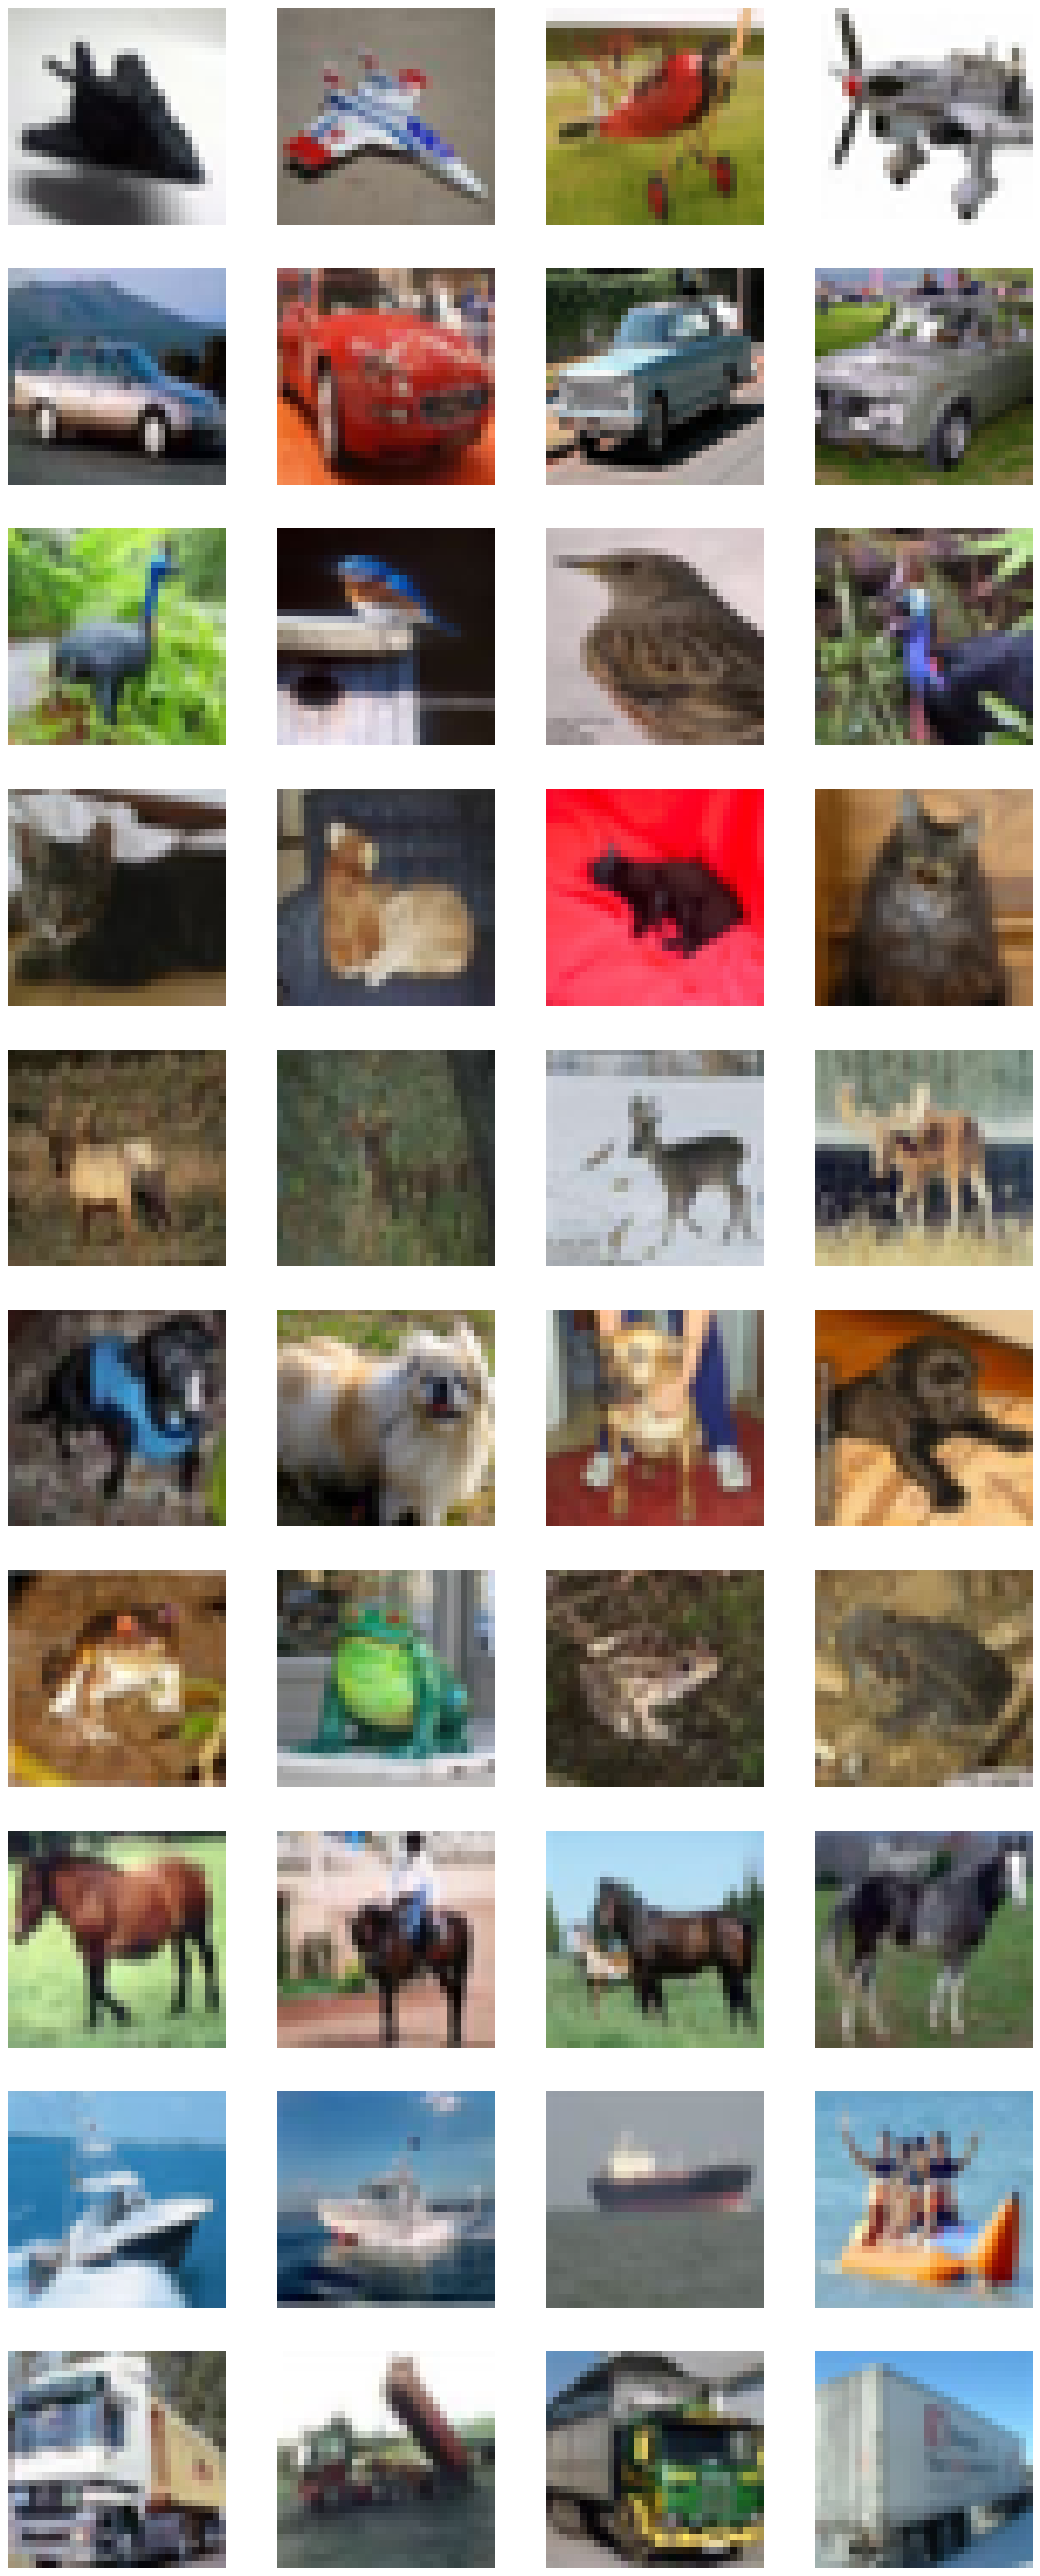

In [11]:
# Ex.1.3 
sub_plots = 4
n = len(unique_labels)
fig, axes = plt.subplots(n, sub_plots, figsize=(16, n * sub_plots))

for i, category_label in enumerate(unique_labels):
    indices = np.where(categories == category_label)[0][:sub_plots]
    # print(indices)

    for j, index in enumerate(indices):
        image, label = dataset_train[index]
        axes[i, j].imshow(image)
        axes[i, j].axis('off') 
        
plt.show()

#### Exercise 1.4 - RGB feature extraction

Extract RGB values from each image in your dataset as three seperate lists(one per channel). Each list should have 8 values. To do so, you can compute the histogram of each channel with 8 bins. Then you have to concatenate the values of all the three channels together resulting in a feature vector of size 24. This feature vector is the descriptor of an image in your dataset. You will have to do this for all the images present in your dataset in order to get the overall RGB descriptor which will be of size (n,24). Here 'n' depends on the number of samples present in the dataset. 

In [12]:
# Ex.1.4
descriptors = []
for img, _ in dataset_train:
    img_np = np.array(img)  
    channel_hists = [np.histogram(img_np[..., i], bins=8, range=(0, 255))[0] for i in [0,1,2]]
    descriptors.append(np.concatenate(channel_hists))

rgb_descriptors = np.array(descriptors)
print(rgb_descriptors.shape)

(50000, 24)


#### Exercise 1.5 - Compute the inter-class variability of your dataset.

Inter-class correlation aims at understanding the relationship/correlation among the classes/categories present in your dataset. For this, you could compute a measure (for example mean, std etc.) collectively for all the samples belonging to each and every class of the dataset. Then you could make use of this measure to find the correlation among the classes/categories using the standard pandas dataframe correlation function. Link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [ ]:
# Ex.1.5 
# Splitting descriptors per class
class_descriptors = {cls: [] for cls in class_names}  
for desc, (_, label) in zip(rgb_descriptors, dataset_train):  
    class_descriptors[class_names[label]].append(desc)  

# Computing mean descriptor per class 
df = pd.DataFrame([np.mean(descriptors, axis=0) for descriptors in class_descriptors.values()], 
                  index=class_names)

correlation_matrix = df.corr()
print(correlation_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.856893 -0.241771 -0.722060 -0.874161 -0.578459  0.145789   
1   0.856893  1.000000  0.109459 -0.495875 -0.790501 -0.862627 -0.140945   
2  -0.241771  0.109459  1.000000  0.788284  0.459657 -0.406107 -0.925079   
3  -0.722060 -0.495875  0.788284  1.000000  0.902101  0.157771 -0.758869   
4  -0.874161 -0.790501  0.459657  0.902101  1.000000  0.547358 -0.443138   
5  -0.578459 -0.862627 -0.406107  0.157771  0.547358  1.000000  0.459342   
6   0.145789 -0.140945 -0.925079 -0.758869 -0.443138  0.459342  1.000000   
7   0.529463  0.404062 -0.737746 -0.892030 -0.828128 -0.272238  0.666559   
8   0.886045  0.686961 -0.213067 -0.578729 -0.704223 -0.430268  0.077081   
9   0.722941  0.680230  0.092725 -0.322155 -0.534894 -0.530068 -0.178762   
10  0.061300  0.182191  0.758707  0.524245  0.244592 -0.309935 -0.742118   
11 -0.583042 -0.405096  0.815142  0.958123  0.839056  0.156532 -0.763075   
12 -0.861559

**c)** Compute the Silhouette score. 

The Silhouette score is used to assess the performance of using unsupervised machine learning (clustering). We can also use it here to assess the compactness of the extracted descriptors per category and for the group of categories as their mean.

You can use the function available in Sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [33]:
# Ex.1.5c 
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(rgb_descriptors)  

score = silhouette_score(rgb_descriptors, kmeans.labels_)
print(score)

0.11764294334979772


**Reflection: (Answer the below questions)** 

**1.** Does Intra-class correlation score/coefficient help you assess the degree of similarity among the samples of a category?
> Your Answer (Double click to edit): 

**2.** What can you deduce from the Inter-class correlation and Silhouette score?
> Your Answer (Double click to edit): 

#### Exercise 1.6 - Dimensionality reduction for visualization 

We can visualize large datasets having higher dimensions or features in 2- or 3-dimensional spaces. For this, you need to reduce the dimensionality of the data. 

In this exercise, you are asked to use PCA for reducing dimensionality.

Link to function to apply PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Create the following two figures:

**a)** Rely on the first 2 principal components to plot the samples of your dataset. Use one color per class.

In [ ]:
# Ex.1.6a your code here

**b)** Rely on the first 3 principal components to create a 3D plot. Use one color per class.

In [ ]:
# Ex.1.6b your code here

#### Exercise 1.7 - Reflection

Reflect on the following questions.

**a)** Will you obtain the same visualisation in the feature space for different extracted features?
> Your Answer (Double click to edit): 
    
**b)** Are the classes distinguishable on the feature space when relying on PCA over RGB?
> Your Answer (Double click to edit): 
    
**c)** What other visualization could you include to better describe your data?
> Your Answer (Double click to edit): 

#### [Optional] Exercise: Repeat experiments with different image descriptors

e.g. 
- Harris Corner Detection

- Shi-Tomasi Corner Detector and Good Features to Track

- Scale-Invariant Feature Transform (SIFT)

- Speeded-up robust features (SURF)

- Features from Accelerated Segment Test (FAST)

- Blob Detectors With LoG, DoG, and DoH

If you have OpenCV installed you can follow this example,
https://automaticaddison.com/image-feature-detection-description-and-matching-in-opencv/

When using Scikit-image,
https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog